### Part 1
1. Proof of the form of the linear discriminant function
2. Proof of the form of decision boundary

### Part 2

1. Found the minima of E(w) in two iterations
2. Draws contours
3. Shows learning path graphically

### Part 3

1. Shows that logistic regression is a non-linear regression problem
2. Treat logistic discrimination in terms of equivalent linear regression

##### Part 1 attached with reference added below

##### PART 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

Result at 10 iteration =  28.660083735050726
Result at 20 iteration =  24.819392944854677
Result at 30 iteration =  22.36308956254163
Result at 40 iteration =  20.43006409941553
Result at 50 iteration =  18.7783093321145
Result at 60 iteration =  17.32676085320618
Result at 70 iteration =  16.038781980797292
Result at 80 iteration =  14.891431818886751
Result at 90 iteration =  13.867096230070816
W =  1.1995853082541494 & b =  -0.1466416287337599


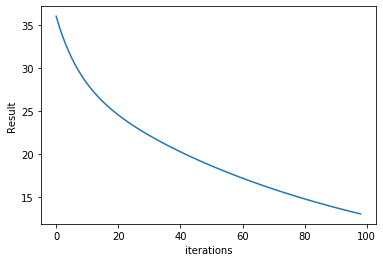

Result at 10 iteration =  20.23728576121578
Result at 20 iteration =  13.669337055089692
Result at 30 iteration =  10.149530635611743
Result at 40 iteration =  7.70702652362503
Result at 50 iteration =  5.8294937618503795
Result at 60 iteration =  4.344442940504366
Result at 70 iteration =  3.1682841190791553
Result at 80 iteration =  2.2453702608833948
Result at 90 iteration =  1.5322441981075738
W =  -0.332165586281984 & b =  0.5748021621281751


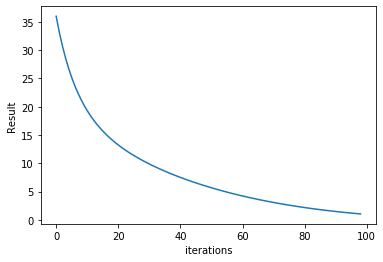

In [9]:
## PART 2.1:
## FIND MINIMA:

X = [0,0.12,0.25,0.27,0.38,0.42,0.44,0.55,0.92,1.0]
Y = [0,0.15,0.54,0.51, 0.34,0.1,0.19,0.53,1.0,0.58]

for j in [2,-2]:
    results = []
    #Step 1: Parameter initialization 
    W = j
    b = 0.01

    for i in range(1, 100):

    #Step 2: Step 2: Calculate Results from given Function
        Y_pred = np.multiply(W, X) + b
        function = 2*W**2 + 2*W*W + 5*W**2

    #Step 3: Calculate dW and db    
        db = np.sum((Y_pred - Y))
        dw = np.dot((Y_pred - Y), X)
        results.append(function)

    #Step 4: Update parameters:
        W = W - 0.01*dw
        b = b - 0.01*db
        
## PART 2.2:
## DRAW CONTOURS:
        if i%10 == 0:
            print("Result at", i,"iteration = ", function)

## PART 2.3:
## PLOTS LEARNING PATH:   
    #Plot the results against no. of iterations
    print("W = ", W,"& b = ",  b)
    plt.plot(results)
    plt.ylabel('Result')
    plt.xlabel('iterations')
    plt.show()
    
# (Rizwan, 2018)

Gradient descent is an iterative optimization algorithm to find the minimum value (local optima) of a function. Gradient descent is efficient with both linear and classification problems and provides required accuracy with multiple parameters (Weights and bias). It involves following steps:

1. Initialize parameters (Weights and bias) at random position or simply as zero.
2. Calculate cost function (J).
3. Take the partial derivative of the cost function with respect to Weights and bias (dW and db).
4. Change parameters values as:
    - Wnew = W – learning rate * dW
    - Bnew = b – learning rate * db
5. Again, start from step 2 with new values of W and b and repeat the same for ‘n’ no. of iterations. With each iteration, the value of cost will progressively decrease and eventually end up with flat value. (Rizwan, 2018).

Gradient descent is a way to minimize an objective function F(θ) with a model’s parameters θ by updating the parameters in the opposite direction of the gradient of the objective function ∇θF(θ) to the parameters. The learning rate η determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the objective function downhill until we reach a valley. (Ruder, 2017).

##### PART 3

In [4]:
adult_df = pd.read_csv('AdultT6.csv')
adult_df = adult_df.dropna()
adult_df.head()

adult_df['income'] = adult_df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

X = pd.DataFrame(adult_df[['age','education-num','hours-per-week']])
X = sm.add_constant(X)
y = pd.DataFrame(adult_df[['income']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=6)

logreg01 = sm.Logit(y_train,X_train).fit()
logreg01.summary2()

Optimization terminated successfully.
         Current function value: 0.444552
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.190     
Dependent Variable: income           AIC:              20012.8337
Date:               2020-09-23 21:48 BIC:              20044.9188
No. Observations:   22500            Log-Likelihood:   -10002.   
Df Model:           3                LL-Null:          -12355.   
Df Residuals:       22496            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -8.4911   0.1325 -64.0651 0.0000 -8.7509 -8.2313
age               0.0466   0.0014  33.5386 0.0000  0.0439  0.0493
education-num     0.3413   0.0078  43.7510 0.0000  0.3260  0.3566
hours-per-week    0.0431   0.0015  28.1761 0.0000  0.0401  0.0461
=================================================================

"""

C:\Users\zzenz\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


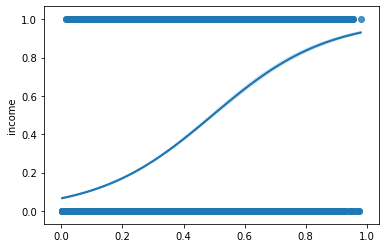

In [5]:
clf = LogisticRegression(random_state=6).fit(X_train, y_train)
sns.regplot(x=clf.predict_proba(X_train)[:,1], y=y_train, logistic=True)

In Logistic Regression the probability, odds, and log odds are calculated as follows:
- Probability of (Y=1): p=eα+β1x1+β2x21+eα+β1x1+β2x2
- Odds of (Y=1): (p1−p)=eα+β1x1+β2x2
- Log Odds of (Y=1): log(p1−p)=α+β1x1+β2x2

We can see from the above plot that Logistic regression is indeed non linear in terms of Odds and Probability, however it is linear in terms of Log Odds. The below plot shows the linearity of the log odds for one of the 3 inputs. 

Gopal expresses the nonlinearity of the logistic regression as follows:

- P(Class 1|x) = 1 / 1+ exp[- (wT x + w0)]

Where {w, w0} is the set of adjustable weights in binary classification (nonlinearity is a sigmoid function). (Gopal, 2019, p.120).

He continues to express the linearity of Logistic Regression by explaining the log odds as follows, "The transformation to log(odds), with logit as a dependent variable, converts the problem to a possibly linear regression task. For binary classification problem, it is assumed that

- log(odds) = log P(Class|x) / 1 - P(Class|x) = w0, w1x1, …, wnxn

w0, w1, …, wn are (n + 1) parameters of linear logit function" (Gopal, 2019, p.126). 

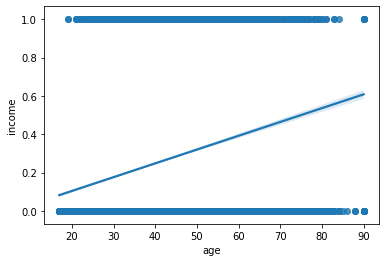

In [17]:
sns.regplot(x=X_train['age'], y=y_train)

### REFERENCES

Ghojogh, B., &amp; Crowley, M. (2019, June 1). Linear and Quadratic Discriminant Analysis: Tutorial. Retrieved from https://arxiv.org/abs/1906.02590


Gopal, M. (2019). Applied machine learning. New York: McGraw-Hill Education. 


Rizwan, M. (2018, May 15). Gradient Descent – A Simple Way to Understand. Retrieved from https://engmrk.com/gradient-descent/?utm_campaign=News


Ruder, S. (2017, June 15). An overview of gradient descent optimization algorithms.Retrieved from https://arxiv.org/abs/1609.04747